<h1>CNN Model Utilizing Batch Normalization, Dropout, and Data Augmentation for Tomato Leaf Disease Classification</h1>

<h2>1. Load and Preprocess the Data</h2>

<h4>1.1. Libraries Import :<br> Import Tensorflow and Keras.</h4>

In [ ]:
# Import libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

<h4>1.2. Dataset Paths :<br> Paths to the training and test datasets are specified.</h4>

In [ ]:
# Path to dataset directories
# download the dataset from https://www.kaggle.com/datasets/naveedgull/tomato-leaf-disease

train_dir = r"C:\vscode\Tomato Leaf Disease\train"
test_dir = r"C:\vscode\Tomato Leaf Disease\test"

<h4>1.3. Parameters :<br> The batch size and the number of epochs are defined.</h4>

In [ ]:
# Parameters
BATCH_SIZE = 32
EPOCHS = 20

<h4>1.4. Data Augmentation and Preprocessing :<br> ImageDataGenerator is used to apply rescaling and data augmentation (zoom, horizontal flip, etc.) to the training images. It also splits the training data into 80% training and 20% validation.</h4>

In [ ]:
# Data Augmentation and Preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

<h4>1.5. Data Generators :<br> Data generators are created for training, validation, and testing datasets.</h4>

In [ ]:
# Training data generator
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

# Validation data generator
validation_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# Testing data generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 12053 images belonging to 10 classes.
Found 3011 images belonging to 10 classes.
Found 3771 images belonging to 10 classes.


<h4>1.6. Class Distribution :<br> The class distribution in the training, validation, and testing datasets is printed.</h4>

In [ ]:
# Verify class distribution
print("Training set classes:", train_generator.class_indices)
print("Validation set classes:", validation_generator.class_indices)
print("Testing set classes:", test_generator.class_indices)

Training set classes: {'Tomato___Bacterial_spot': 0, 'Tomato___Early_blight': 1, 'Tomato___Late_blight': 2, 'Tomato___Leaf_Mold': 3, 'Tomato___Septoria_leaf_spot': 4, 'Tomato___Spider_mites Two-spotted_spider_mite': 5, 'Tomato___Target_Spot': 6, 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 7, 'Tomato___Tomato_mosaic_virus': 8, 'Tomato___healthy': 9}
Validation set classes: {'Tomato___Bacterial_spot': 0, 'Tomato___Early_blight': 1, 'Tomato___Late_blight': 2, 'Tomato___Leaf_Mold': 3, 'Tomato___Septoria_leaf_spot': 4, 'Tomato___Spider_mites Two-spotted_spider_mite': 5, 'Tomato___Target_Spot': 6, 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 7, 'Tomato___Tomato_mosaic_virus': 8, 'Tomato___healthy': 9}
Testing set classes: {'Tomato___Bacterial_spot': 0, 'Tomato___Early_blight': 1, 'Tomato___Late_blight': 2, 'Tomato___Leaf_Mold': 3, 'Tomato___Septoria_leaf_spot': 4, 'Tomato___Spider_mites Two-spotted_spider_mite': 5, 'Tomato___Target_Spot': 6, 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 7, 'Tomato___

<h2>2. Build the CNN Model</h2>

<h4>2.1. Sequential Model :<br> A Sequential model is defined.</h4>

In [ ]:
# Define the CNN model with Batch Normalization and Dropout
model = models.Sequential()

<h4>2.2. Convolutional Blocks :<br> Four convolutional blocks are added. Each block consists of a Conv2D layer, a MaxPooling2D layer, and a Dropout layer to prevent overfitting.</h4>

In [ ]:
# Block 1
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

# Block 2
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

# Block 3
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

# Block 4
model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

<h4>2.3. Flattening and Dense Layers :<br> After the convolutional blocks, the model is flattened and followed by two Dense layers. The final Dense layer has 10 units (one for each class) with softmax activation.</h4>

In [ ]:
# Head of the model
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

<h4>2.4. Model Summary :<br> The model summary is printed to show the architecture.</h4>

In [ ]:
# Model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     2,097,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,486,986 (9.49 MB)

 Trainable params: 2,486,986 (9.49 MB)

 Non-trainable params: 0 (0.00 B)

<h2>3. Compile and Train the Model</h2>

<h4>3.1. Model Compilation :<br> The model is compiled with the Adam optimizer, categorical cross-entropy loss function, and accuracy as the evaluation metric.</h4>

In [ ]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

<h4>3.2. Plot Model :<br> Make the plot model architecture.</h4>

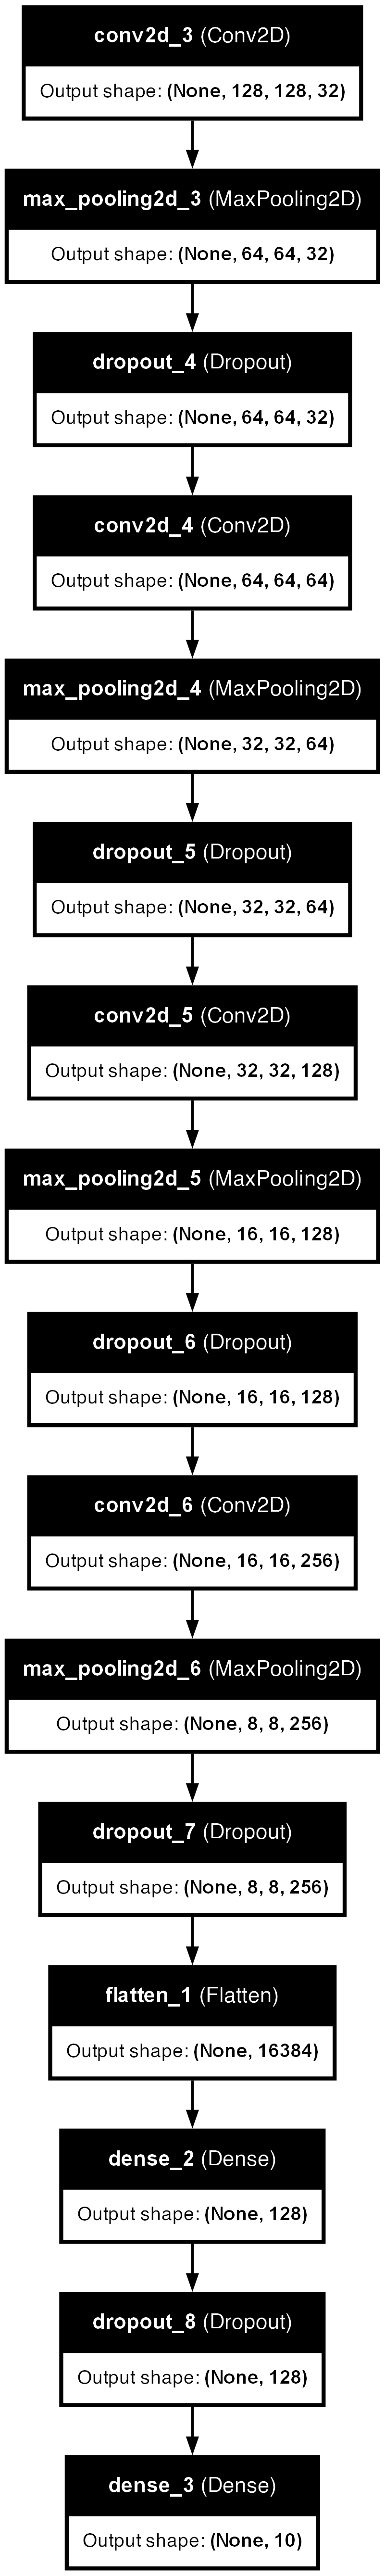

In [ ]:
# Plot model architecture
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

<h4>3.3. Model Training :<br> The model is trained using the train_generator for training data and validation_generator for validation data. The number of epochs and batch size are specified.</h4>

In [ ]:
# Train the model
hist_train = model.fit(
    train_generator, 
    validation_data=validation_generator, 
    epochs=EPOCHS, 
    batch_size=BATCH_SIZE
)

Epoch 1/20


c:\Users\rehankmil\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


377/377 ━━━━━━━━━━━━━━━━━━━━ 221s 570ms/step - accuracy: 0.3335 - loss: 1.9387 - val_accuracy: 0.6430 - val_loss: 1.1833
Epoch 2/20
377/377 ━━━━━━━━━━━━━━━━━━━━ 160s 420ms/step - accuracy: 0.6352 - loss: 1.0831 - val_accuracy: 0.7772 - val_loss: 0.7319
Epoch 3/20
377/377 ━━━━━━━━━━━━━━━━━━━━ 129s 338ms/step - accuracy: 0.7358 - loss: 0.7846 - val_accuracy: 0.7828 - val_loss: 0.6065
Epoch 4/20
377/377 ━━━━━━━━━━━━━━━━━━━━ 122s 321ms/step - accuracy: 0.7846 - loss: 0.6387 - val_accuracy: 0.7436 - val_loss: 0.7074
Epoch 5/20
377/377 ━━━━━━━━━━━━━━━━━━━━ 123s 325ms/step - accuracy: 0.8057 - loss: 0.5631 - val_accuracy: 0.8343 - val_loss: 0.4560
Epoch 6/20
377/377 ━━━━━━━━━━━━━━━━━━━━ 125s 330ms/step - accuracy: 0.8353 - loss: 0.4782 - val_accuracy: 0.8532 - val_loss: 0.3979
Epoch 7/20
377/377 ━━━━━━━━━━━━━━━━━━━━ 126s 333ms/step - accuracy: 0.8493 - loss: 0.4372 - val_accuracy: 0.8924 - val_loss: 0.3155
Epoch 8/20
377/377 ━━━━━━━━━━━━━━━━━━━━ 121s 320ms/step - accuracy: 0.8557 - loss: 0.42

<h2>4. Evaluate the Model</h2>

<h4>4.1. Model Evaluation :<br> The model is evaluated on the test data using test_generator. The test accuracy is printed.</h4>

In [ ]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)

118/118 ━━━━━━━━━━━━━━━━━━━━ 43s 369ms/step - accuracy: 0.8901 - loss: 0.3428
Test accuracy: 0.89737468957901


<h4>4.2. Accuracy Plot :<br> The training and validation accuracy over epochs are plotted.</h4>

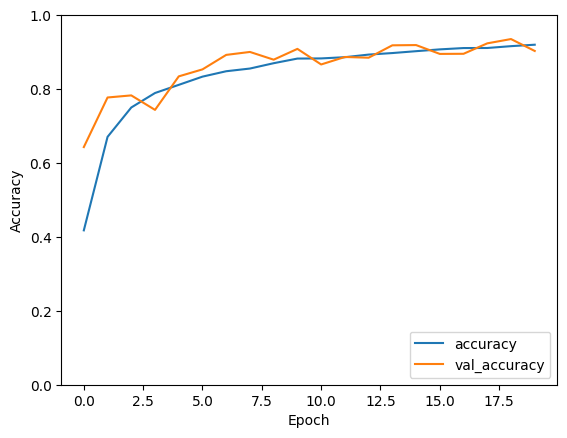

In [ ]:
# Plot training & validation accuracy values
plt.plot(hist_train.history['accuracy'], label='accuracy')
plt.plot(hist_train.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

<h4>4.3. Loss Plot :<br> The training and validation loss over epochs are plotted. These plots help in visualizing the model's performance during training and validation.</h4>

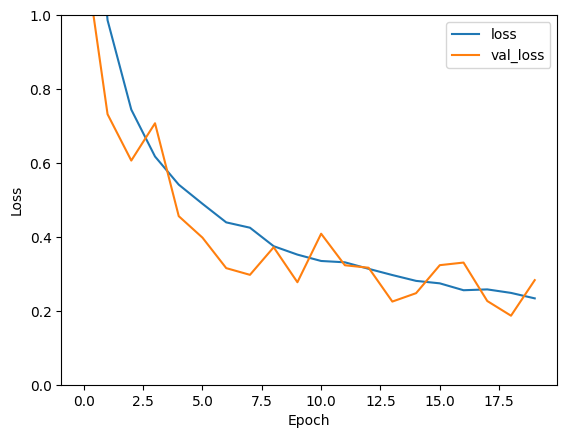

In [ ]:
# Plot training & validation loss values
plt.plot(hist_train.history['loss'], label='loss')
plt.plot(hist_train.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='upper right')
plt.show()